In [20]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest 
from scipy import stats 
import statsmodels.api as sm

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_pickle("./datos/limpieza.pkl")

#### PASOS A SEGUIR(sacado de la clase invertida Regresion Lineal Intro ML)

1. Tomar el conjunto de datos y entendemos las variables que tenemos, haciendo una explicación sencilla de la naturaleza de los datos y lo que significan.
Decidir cual es la variable respuesta y las variables predictoras. 


2. Realizar un EDA exhaustivo:

    - Cantidad de valores nulos y decidir que podríamos hacer con ellos con las herramientas aprendidas en el módulo 2 de imputación de nulos.

    - Investigamos la existencia de *outliers* y decidir que podríamos hacer con ellos, con las herramientas aprendidas en el módulo 2.

    - Realizamos diversas gráficas sobre los datos, para ver sus distribuciones, agrupaciones, etc. Hacer las correlaciones con la correlacion de Pearson y hacer un *heatmap*.

    - Pensamos que transformaciones pueden ser necesarias sobre nuestros datos: crear variables nuevas, transformar variables existentes, eliminar variables redundantes, etc.

    - Aplicamos las transformaciones necesarias, *encoding* , normalización y estandarización. Lo veremos en las próximas lecciones. 
 

1. Tomar el conjunto de datos y entendemos las variables que tenemos, haciendo una explicación sencilla de la naturaleza de los datos y lo que significan.
Decidir cual es la variable respuesta y las variables predictoras. 

### Queda pendiente el EDA general ( info, shape, describe, etc...)

### Cantidad de valores nulos y decidir que podríamos hacer con ellos con las herramientas aprendidas en el módulo 2 de imputación de nulos.

No tenemos nulos

In [30]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Investigamos la existencia de *outliers* y decidir que podríamos hacer con ellos, con las herramientas aprendidas en el módulo 2.

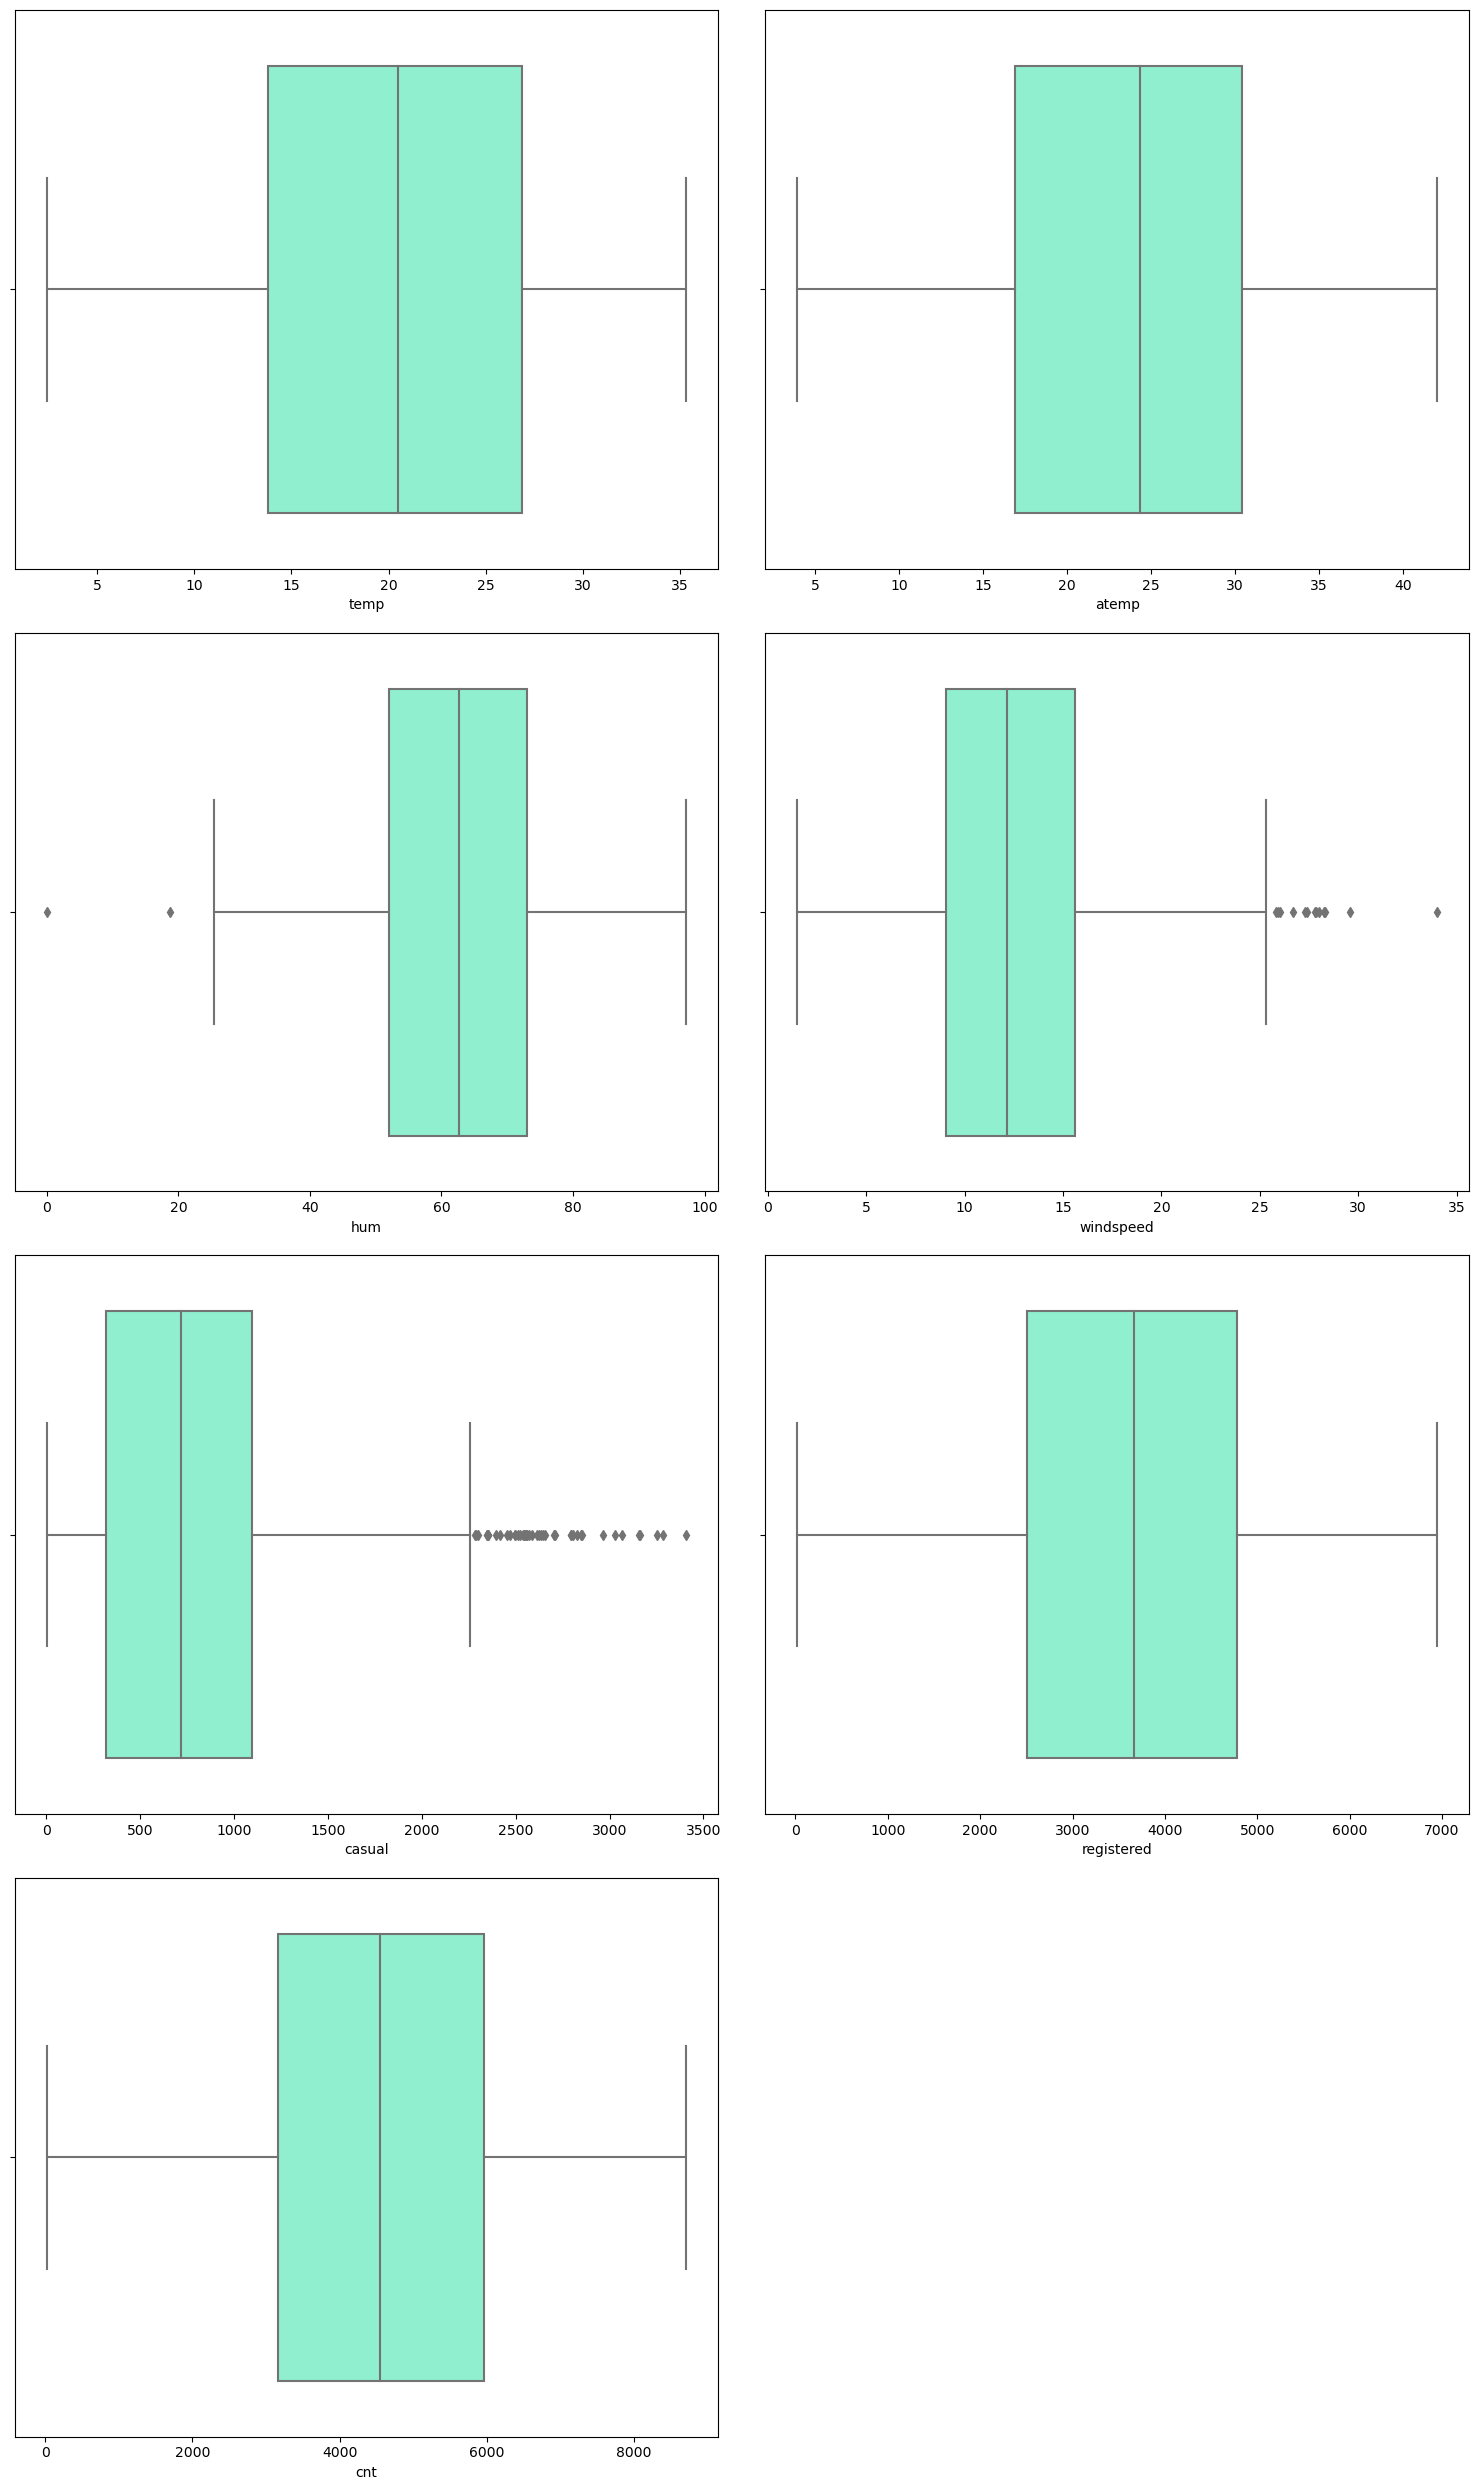

In [28]:
# para numéricas

fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()

fig.delaxes(axes[-1])
plt.show()

In [ ]:
# no me deja hacer el boxplot para categoricas, probamos el regplot¿¿???

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
categoricas = df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']]
categoricas

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit
0,2018-01-01,4,0,1,0,6,0,2
1,2018-02-01,4,0,1,0,0,0,2
2,2018-03-01,4,0,1,0,1,1,1
3,2018-04-01,4,0,1,0,2,1,1
4,2018-05-01,4,0,1,0,3,1,1
...,...,...,...,...,...,...,...,...
725,2019-12-27,4,1,12,0,4,1,2
726,2019-12-28,4,1,12,0,5,1,2
727,2019-12-29,4,1,12,0,6,0,2
728,2019-12-30,4,1,12,0,0,0,1


In [15]:
numericas = df[['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
numericas

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.11,18.18,80.58,10.75,331,654,985
1,14.90,17.69,69.61,16.65,131,670,801
2,8.05,9.47,43.73,16.64,120,1229,1349
3,8.20,10.61,59.04,10.74,108,1454,1562
4,9.31,11.46,43.70,12.52,82,1518,1600
...,...,...,...,...,...,...,...
725,10.42,11.33,65.29,23.46,247,1867,2114
726,10.39,12.75,59.00,10.42,644,2451,3095
727,10.39,12.12,75.29,8.33,159,1182,1341
728,10.49,11.58,48.33,23.50,364,1432,1796


### Realizamos diversas gráficas sobre los datos, para ver sus distribuciones, agrupaciones, etc. Hacer las correlaciones con la correlacion de Pearson y hacer un *heatmap*.

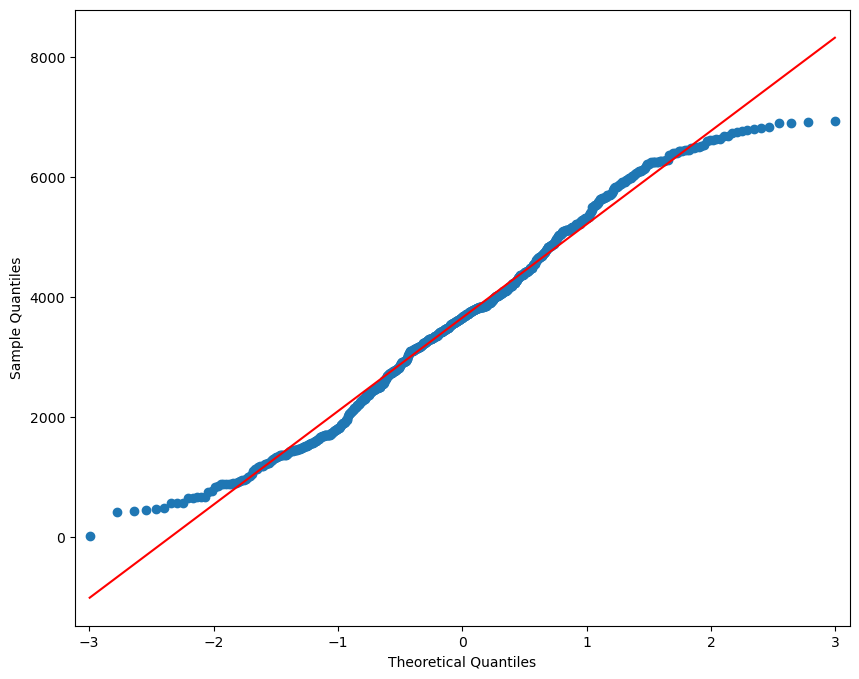

In [21]:
sm.qqplot(df['registered'], line= 's');

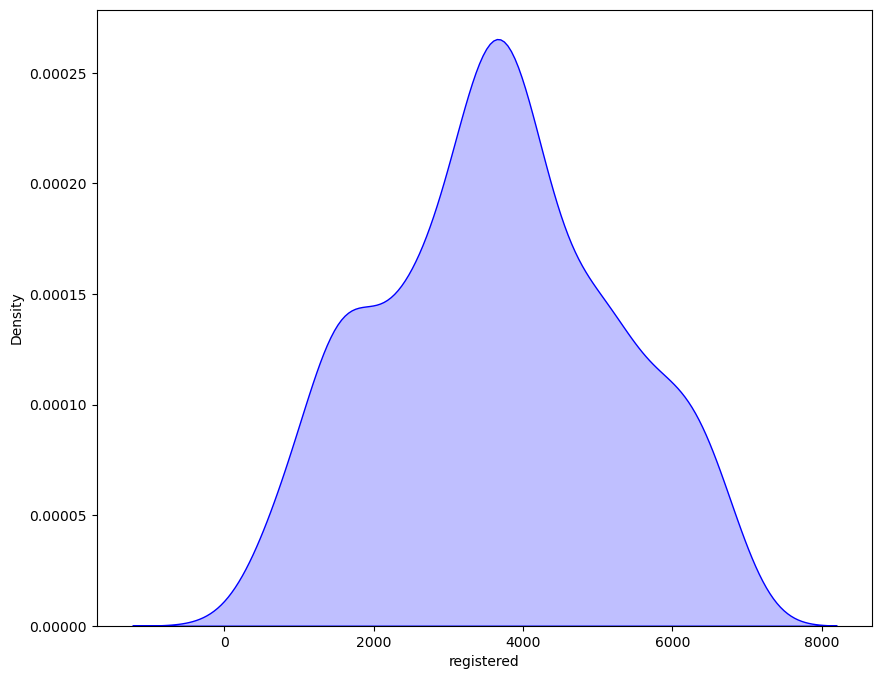

In [22]:
# queremos comprobar si la distribución de la variable es normal o no. Aqui miramos registered.

sns.distplot(
df['registered'], # variable respuesta
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1}); 

In [23]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

''

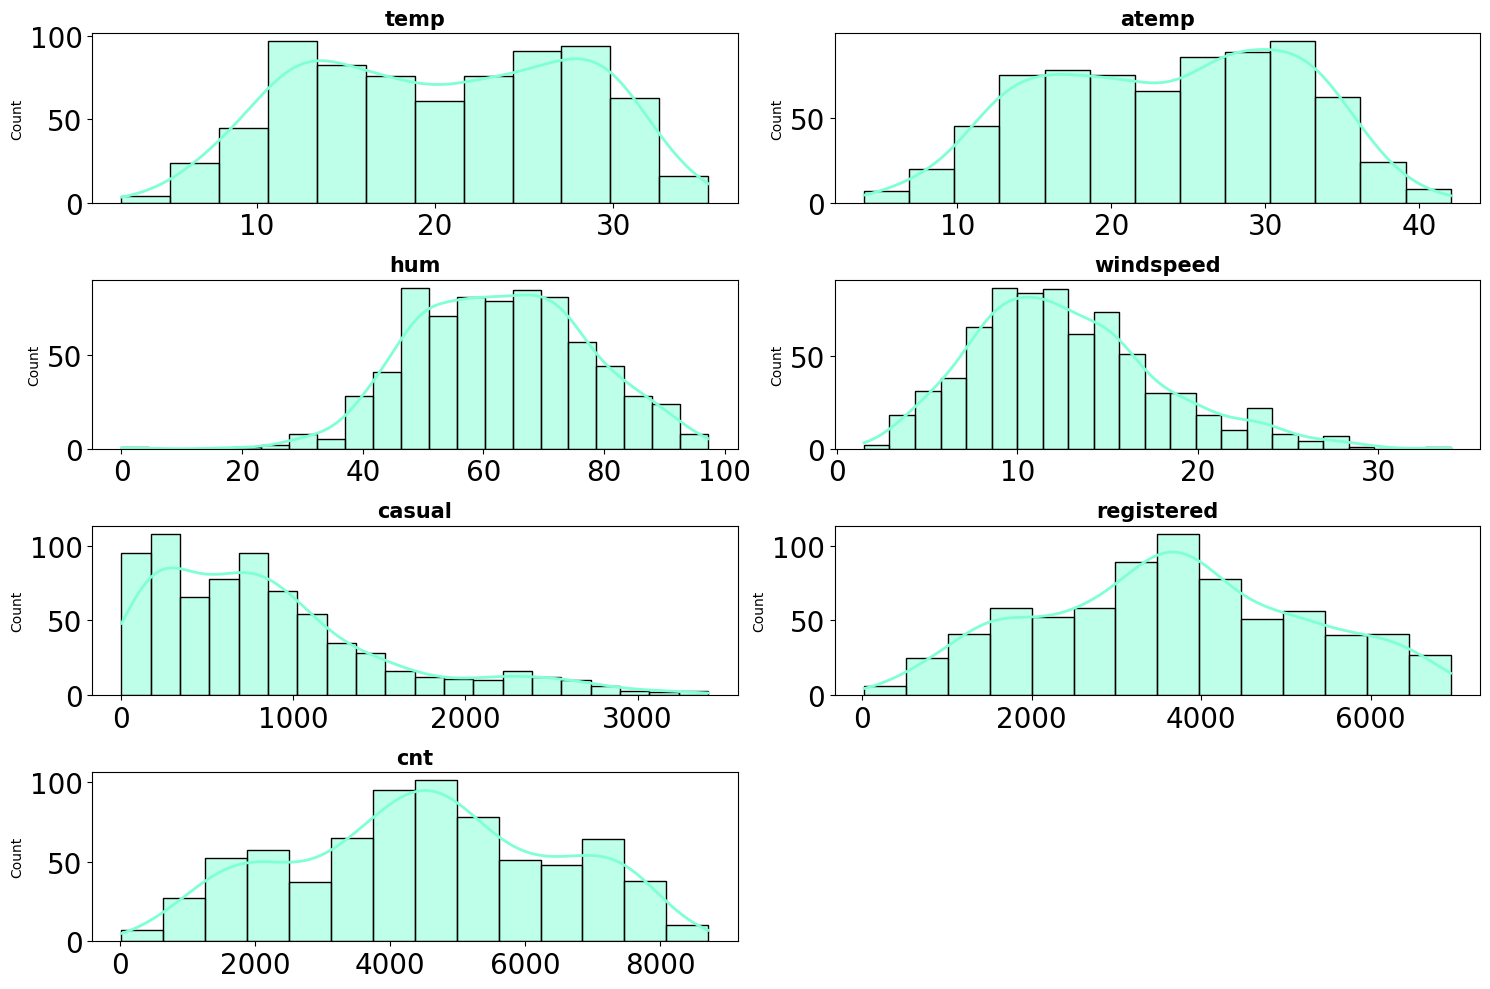

In [27]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,10))


axes = axes.flat


for i, colum in enumerate(numericas): 
    sns.histplot(
    data = df,
    x = colum,
    kde = True, 
    color = "aquamarine", 
    line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
    alpha = 0.5, # para especificar la transparencia del color
    ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.delaxes(axes[-1])
fig.tight_layout()
; 

### EDA intro ML,  para variables categóricas

- Tenemos que elegir las gráficas que más convengan para las variables categoricas

### Pensamos que transformaciones pueden ser necesarias sobre nuestros datos: crear variables nuevas, transformar variables existentes, eliminar variables redundantes, etc.

 ### Aplicamos las transformaciones necesarias, *encoding* , normalización y estandarización. Lo veremos en las próximas lecciones. 